<a href="https://colab.research.google.com/github/Mikikn/Finance-Gender-Pay-Gap-Project/blob/main/Project_Development_Gender_Gap.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


## Project Title: Analyzing the Gender Pay Gap in the UK Finance Sector: A Comprehensive Approach


## Outcome 2: Collect data safely and securely.






### (a) Data Identification and Sources

The essential data for this analysis encompasses critical details like EmployerName, PostCode, SicCodes, and various gender pay gap metrics. This invaluable information was sourced from the official Gender Pay Gap Reporting guidance at [gov.uk](https://www.gov.uk/government/publications/gender-pay-gap-reporting-guidance-for-employers). Furthermore, the dataset can be directly downloaded from the official Gender Pay Gap Service at [gov.uk](https://gender-pay-gap.service.gov.uk/viewing/download).

The dataset is composed of seven CSV files, spanning the years from 2017 to 2023. In addition, the Postcodes Master CSV file was obtained from my Moodle course(more convenient resource compared to the National Statistics Postcode source, which is a larger size and demands substantial transformation for practical application).


### (b) Dataset Assembly
For assembling the dataset, I used Python and Power BI. Python was used initially for cleaning the data, while Power BI was employed for subsequent analysis and transformation. In Python, I gathered data from [gov.uk](https://gender-pay-gap.service.gov.uk/viewing/download) using website links in Google Colab. I merged datasets together using a concatenating function. After the cleaning process, it was subsequently converted into CSV format and downloaded from colab then, I securely saved the data on OneDrive at Edinburgh College, residing within a designated folder labeled 'Finance Gender Gap'. The file itself was named 'cleaned_finance_gender_gap' for easy reference. For comparison purposes, I also directly downloaded the seven individual datasets and saved them to OneDrive at Edinburgh College under a folder named 'Trail Finance Gender Gap'. I then connected to Power BI using the 'connect folder' option, allowing me to combine and load the data. I discovered a striking similarity between the datasets obtained through both methods after the cleaning process. One notable advantage of using Python is its ability to source data via URL, eliminating the need for re-cleaning if the source updates. Conversely, Power BI shines in its user-friendliness, especially when it comes to connecting and combining datasets without the need for coding and extensive cleaning. This prepared the data for further analysis and transformation in Power BI.


### (c) Secure Data Storage
I took extra measures to securely store the datasets. They are now safely housed in a designated OneDrive folder at Edinburgh College. Since  I used open-source dataset information, there aren't significant concerns about privacy. However, for the sake of this project's progress, I've currently limited access to only David and Rik. Once I've presented and received their feedback, I'll adjust the folder's accessibility to make it available to the public.

### (d) Bias Considerations
While going through the dataset, I noticed something interesting. When I looked at the files covering the year 2023 to 2024, one of them was much smaller, only 155KB. The others were quite a bit larger, around 2.7MB or more.

Upon further investigation, it became evident that this discrepancy may indicate an incomplete representation of data for the entire year. As a result, to ensure the integrity and accuracy of my analysis, I have made the decision to exclude this particular dataset from my examination.

Additionally, in the postal code file, I encountered instances where a single postcode was associated with two different regions (Scotland and England). After careful consideration, I determined that the correct region should be based on the first entry. Consequently, I have taken the necessary steps to remove the second entry.

This precautionary measure serves to mitigate potential biases that could arise from an incomplete dataset, and thereby, enhances the reliability of the insights generated from my analysis.


### (e) Impact of Data Quality Issues
When preparing the dataset for analysis, I performed the following steps in Google Colab:

- Dropped Rows with Missing Values:
           cleaned_data = cleaned_data.drop(columns=columns_to_drop)

cleaned_data = original_data.dropna()

- Removing unnecessary columns
      columns_to_drop =
                    ['PostcodeArea', 'CompanyLinkToGPGInfo', 'ResponsiblePerson',
                   'EmployerId', 'Address', 'CompanyNumber', 'CurrentName',
                   'SubmittedAfterTheDeadline', 'DueDate', 'DateSubmitted']

By executing these steps, I ensured that the dataset is cleaned and focused only on the relevant information, which is essential for accurate and meaningful analysis. This process helps improve data quality, streamline analysis, and facilitate the creation of visualizations and models.


## Outcome 3: Analyzing Data for Insights.



### (a) Data Preparation and Pre-processing

Having investigated what cleaning is required, this is where I took action.

I worked with a dataset containing 59,099 entries and 28 columns. Here's what I did to prepare and pre-process the data:

- Handling Missing Values:

I noticed missing values in columns like Address, PostCode, CompanyNumber, SicCodes, DiffMeanBonusPercent, and others.

- Handling Duplicate Entries:

Fortunately, I didn't find any duplicate entries in the dataset.

- Removing Unnecessary Columns:

I decided to remove columns like 'EmployerId', 'SubmittedAfterTheDeadline', 'DueDate', 'DateSubmitted', and others that weren't necessary for my analysis.

In [2]:
import pandas as pd

file_urls = [
    "https://gender-pay-gap.service.gov.uk/viewing/download-data/2017",
    "https://gender-pay-gap.service.gov.uk/viewing/download-data/2018",
    "https://gender-pay-gap.service.gov.uk/viewing/download-data/2019",
    "https://gender-pay-gap.service.gov.uk/viewing/download-data/2020",
    "https://gender-pay-gap.service.gov.uk/viewing/download-data/2021",
    "https://gender-pay-gap.service.gov.uk/viewing/download-data/2022"
]

# Initialize an empty list to hold DataFrames
dfs = []

# Load and process each CSV file
for url in file_urls:
    # Load CSV
    df = pd.read_csv(url)

    # Extract the year from the URL
    year = int(url.split("/")[-1])

    # Add a 'Year' column with the extracted year
    df['Year'] = year

    # Append the DataFrame to the list
    dfs.append(df)

# Concatenate all DataFrames
combined_data = pd.concat(dfs, ignore_index=True)


In [3]:
combined_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59107 entries, 0 to 59106
Data columns (total 28 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   EmployerName               59107 non-null  object 
 1   EmployerId                 59107 non-null  int64  
 2   Address                    59049 non-null  object 
 3   PostCode                   58873 non-null  object 
 4   CompanyNumber              51349 non-null  object 
 5   SicCodes                   55412 non-null  object 
 6   DiffMeanHourlyPercent      59107 non-null  float64
 7   DiffMedianHourlyPercent    59107 non-null  float64
 8   DiffMeanBonusPercent       47601 non-null  float64
 9   DiffMedianBonusPercent     47599 non-null  float64
 10  MaleBonusPercent           59107 non-null  float64
 11  FemaleBonusPercent         59107 non-null  float64
 12  MaleLowerQuartile          58713 non-null  float64
 13  FemaleLowerQuartile        58713 non-null  flo

In [4]:
# combined_data is DataFrame with the gender pay gap data
# Extract postcode area from PostCode column
combined_data['PostcodeArea'] = combined_data['PostCode'].str.extract(r'^([A-Z]{1,2})', expand=False)

# Load the CSV with postcode area mappings using a different encoding
postcode_area_mapping = pd.read_csv('/content/drive/MyDrive/Postcode outers  starter file.csv', encoding='latin1')
import pandas as pd

# Create a dictionary mapping postcode areas to regions
postcode_area_to_region = dict(zip(postcode_area_mapping['Postcode area'], postcode_area_mapping['Country']))

# Map postcode areas to regions
combined_data['Region'] = combined_data['PostcodeArea'].map(postcode_area_to_region)


In [5]:
# Define a dictionary mapping SIC codes to finance sectors
finance_sectors = {
    '64110': 'Banking',
    '64191': 'Banking',
    '65110': 'Insurance',
    '65120': 'Insurance',
    '65201': 'Insurance',
    '65202': 'Insurance',
    '66220': 'Insurance',
    '66210': 'Insurance',
    '66290': 'Insurance',
    '64192': 'Building Societies',
    '64201': 'Financial Holding Company',
    '64202': 'Financial Holding Company',
    '64203': 'Financial Holding Company',
    '64204': 'Financial Holding Company',
    '64205': 'Financial Holding Company',
    '64209': 'Financial Holding Company',
    '64205': 'Financial services',
    '64301': 'Investment',
    '64302': 'Investment',
    '64303': 'Investment',
    '64304': 'Investment',
    '64305': 'Investment',
    '64306': 'Investment',
    '66110': 'Other Finance',
    '66120': 'Other Finance',
    '66190': 'Other Finance',
    '66300': 'Other Finance',
    '64921': 'Other Finance',
    '64922': 'Other Finance',
    '64929': 'Other Finance',
    '64991': 'Other Finance',
    '64992': 'Other Finance',
    '64999': 'Other Finance',
    '64910': 'Other Finance'
}

# Extract the first SIC code
combined_data['SicCodes'] = combined_data['SicCodes'].str.extract(r'(\d+)')

# Create a new column 'FinanceSector' based on the mapping
combined_data['FinanceSector'] = combined_data['SicCodes'].map(finance_sectors)



In [6]:
# Define a list of finance sectors you want to filter for
finance_sectors_to_filter = ['Banking', 'Insurance', 'Building Societies', 'Financial Holding Company', 'Investment','Financial services', 'Other Finance']

# Filter the data based on the finance sectors list
filtered_data = combined_data[combined_data['FinanceSector'].isin(finance_sectors_to_filter)]


In [7]:
filtered_data.columns

Index(['EmployerName', 'EmployerId', 'Address', 'PostCode', 'CompanyNumber',
       'SicCodes', 'DiffMeanHourlyPercent', 'DiffMedianHourlyPercent',
       'DiffMeanBonusPercent', 'DiffMedianBonusPercent', 'MaleBonusPercent',
       'FemaleBonusPercent', 'MaleLowerQuartile', 'FemaleLowerQuartile',
       'MaleLowerMiddleQuartile', 'FemaleLowerMiddleQuartile',
       'MaleUpperMiddleQuartile', 'FemaleUpperMiddleQuartile',
       'MaleTopQuartile', 'FemaleTopQuartile', 'CompanyLinkToGPGInfo',
       'ResponsiblePerson', 'EmployerSize', 'CurrentName',
       'SubmittedAfterTheDeadline', 'DueDate', 'DateSubmitted', 'Year',
       'PostcodeArea', 'Region', 'FinanceSector'],
      dtype='object')

In [8]:
# Define the columns to drop
columns_to_drop = ['PostcodeArea',  'CompanyLinkToGPGInfo', 'ResponsiblePerson', 'EmployerId', 'Address', 'CompanyNumber', 'CurrentName', 'SubmittedAfterTheDeadline', 'DueDate', 'DateSubmitted']

# Drop the specified columns
filtered_data = filtered_data.drop(columns=columns_to_drop)


In [9]:
filtered_data.columns

Index(['EmployerName', 'PostCode', 'SicCodes', 'DiffMeanHourlyPercent',
       'DiffMedianHourlyPercent', 'DiffMeanBonusPercent',
       'DiffMedianBonusPercent', 'MaleBonusPercent', 'FemaleBonusPercent',
       'MaleLowerQuartile', 'FemaleLowerQuartile', 'MaleLowerMiddleQuartile',
       'FemaleLowerMiddleQuartile', 'MaleUpperMiddleQuartile',
       'FemaleUpperMiddleQuartile', 'MaleTopQuartile', 'FemaleTopQuartile',
       'EmployerSize', 'Year', 'Region', 'FinanceSector'],
      dtype='object')

In [10]:
# Define the desired column order
desired_column_order = ['Year', 'EmployerName', 'SicCodes', 'PostCode', 'EmployerSize', 'FinanceSector', 'Region', 'DiffMeanHourlyPercent', 'DiffMedianHourlyPercent', 'DiffMeanBonusPercent', 'DiffMedianBonusPercent', 'MaleBonusPercent', 'FemaleBonusPercent', 'MaleLowerQuartile', 'FemaleLowerQuartile', 'MaleLowerMiddleQuartile', 'FemaleLowerMiddleQuartile', 'MaleUpperMiddleQuartile', 'FemaleUpperMiddleQuartile', 'MaleTopQuartile', 'FemaleTopQuartile']

# Reorder the columns
filtered_data = filtered_data[desired_column_order]


In [11]:
filtered_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2392 entries, 35 to 59104
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Year                       2392 non-null   int64  
 1   EmployerName               2392 non-null   object 
 2   SicCodes                   2392 non-null   object 
 3   PostCode                   2384 non-null   object 
 4   EmployerSize               2392 non-null   object 
 5   FinanceSector              2392 non-null   object 
 6   Region                     2384 non-null   object 
 7   DiffMeanHourlyPercent      2392 non-null   float64
 8   DiffMedianHourlyPercent    2392 non-null   float64
 9   DiffMeanBonusPercent       2338 non-null   float64
 10  DiffMedianBonusPercent     2337 non-null   float64
 11  MaleBonusPercent           2392 non-null   float64
 12  FemaleBonusPercent         2392 non-null   float64
 13  MaleLowerQuartile          2390 non-null   flo

In [12]:
# Drop rows with missing values
filtered_data = filtered_data.dropna()

# Reset the index
filtered_data.reset_index(drop=True, inplace=True)


In [13]:
filtered_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2327 entries, 0 to 2326
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Year                       2327 non-null   int64  
 1   EmployerName               2327 non-null   object 
 2   SicCodes                   2327 non-null   object 
 3   PostCode                   2327 non-null   object 
 4   EmployerSize               2327 non-null   object 
 5   FinanceSector              2327 non-null   object 
 6   Region                     2327 non-null   object 
 7   DiffMeanHourlyPercent      2327 non-null   float64
 8   DiffMedianHourlyPercent    2327 non-null   float64
 9   DiffMeanBonusPercent       2327 non-null   float64
 10  DiffMedianBonusPercent     2327 non-null   float64
 11  MaleBonusPercent           2327 non-null   float64
 12  FemaleBonusPercent         2327 non-null   float64
 13  MaleLowerQuartile          2327 non-null   float

In [14]:
filtered_data.head(10)

,Year,EmployerName,SicCodes,PostCode,EmployerSize,FinanceSector,Region,DiffMeanHourlyPercent,DiffMedianHourlyPercent,DiffMeanBonusPercent,...,MaleBonusPercent,FemaleBonusPercent,MaleLowerQuartile,FemaleLowerQuartile,MaleLowerMiddleQuartile,FemaleLowerMiddleQuartile,MaleUpperMiddleQuartile,FemaleUpperMiddleQuartile,MaleTopQuartile,FemaleTopQuartile
0,2017,A-Plan Holdings,66220,OX28 4LE,1000 to 4999,Insurance,England,24.3,12.1,56.1,...,16.0,3.0,45.0,55.0,51.0,49.0,60.0,40.0,73.0,27.0
1,2017,Aberdeen Asset Management PLC,64205,AB10 1XL,"5000 to 19,999",Financial services,Scotland,28.0,20.0,72.0,...,85.0,93.0,51.0,49.0,43.0,57.0,57.0,43.0,71.0,29.0
2,2017,ABERDEEN ASSET MANAGERS LIMITED,64999,AB10 1XL,"5000 to 19,999",Other Finance,Scotland,37.0,37.0,67.0,...,95.0,91.0,46.0,54.0,56.0,44.0,73.0,27.0,82.0,18.0
3,2017,ACCOMPLISH GROUP HOLDCO LIMITED,64209,B63 4AH,1000 to 4999,Financial Holding Company,England,3.7,0.9,9.0,...,11.0,9.4,38.0,62.0,40.0,60.0,39.0,61.0,41.0,59.0
4,2017,Acepark Ltd,64209,PR6 9AF,250 to 499,Financial Holding Company,England,26.2,11.0,52.6,...,8.5,9.7,38.7,61.3,39.2,60.8,54.1,45.9,59.5,40.5
5,2017,ACORN INSURANCE AND FINANCIAL SERVICES LIMITED,65120,L37 6BS,250 to 499,Insurance,England,3.4,-5.9,19.1,...,72.0,57.3,58.0,42.0,51.9,48.1,46.9,53.1,50.0,50.0
6,2017,ACT (HOLDINGS) LIMITED,64209,CF24 5ET,250 to 499,Financial Holding Company,Wales,-1.9,0.0,31.3,...,16.3,6.9,29.5,70.5,35.2,64.8,28.4,71.6,25.0,75.0
7,2017,Admiral Group PLC,65120,CF10 2EH,"5000 to 19,999",Insurance,Wales,13.6,3.9,28.8,...,92.8,89.9,48.0,52.0,47.0,53.0,49.0,51.0,60.0,40.0
8,2017,Adrian Flux Insurance Services,66220,PE32 1HN,500 to 999,Insurance,England,37.9,7.4,88.4,...,33.3,26.8,38.0,62.0,31.8,68.2,33.0,67.0,61.2,38.8
9,2017,ADVANTIS CREDIT LIMITED,64921,EC3R 8LJ,250 to 499,Other Finance,England,10.4,2.7,66.9,...,35.1,26.2,39.1,60.9,47.8,52.2,47.8,52.2,55.1,44.9


### (b) Computation of Dataset Summary Metrics

In my data analysis, I’ve calculated a range of summary metrics for my dataset and visualized the data distribution using a histogram

I also selected several Key Performance Indicators (KPIs) to help understand the gender pay gap in different companies. Here's how I approached it:

1. **Mean and Median Hourly Wage Gap**: I chose 'DiffMeanHourlyPercent' and 'DiffMedianHourlyPercent' as KPIs to measure the average and median differences in hourly wages between men and women. These metrics provide a clear picture of the wage disparity in terms of hourly pay.

2. **Mean and Median Bonus Gap**: I selected 'DiffMeanBonusPercent' and 'DiffMedianBonusPercent' to measure the average and median differences in bonuses received by men and women. This helps understand if there's a significant difference in the way bonuses are distributed among genders.

3. **Bonus Recipients**: I considered 'MaleBonusPercent' and 'FemaleBonusPercent' to measure the proportion of men and women who received a bonus. This can indicate if one gender is more likely to receive a bonus than the other.

4. **Quartile Representation**: I used 'MaleLowerQuartile', 'FemaleLowerQuartile', 'MaleLowerMiddleQuartile', 'FemaleLowerMiddleQuartile', 'MaleUpperMiddleQuartile', 'FemaleUpperMiddleQuartile', 'MaleTopQuartile', and 'FemaleTopQuartile' to measure the representation of men and women in each wage quartile. These metrics can show if there's a gender imbalance in different wage categories within companies.

5. **Employer Size**: I included 'EmployerSize' as a KPI to measure the size of the company. The size of a company can influence its gender pay gap, with larger companies often having more resources to address pay disparities.

I also calculated this value for each Region  or FinanceSector to see how the gender pay gap varies across different parts of the country or between different sectors.



In [15]:
# Selecting the columns of interest
selected_columns = ['DiffMeanHourlyPercent', 'DiffMedianHourlyPercent', 'DiffMeanBonusPercent', 'DiffMedianBonusPercent']

# Applying describe() to get summary statistics
summary_stats = filtered_data[selected_columns].describe()

# Print the summary statistics
print(summary_stats)


       DiffMeanHourlyPercent  DiffMedianHourlyPercent  DiffMeanBonusPercent  \
count            2327.000000              2327.000000           2327.000000   
mean               26.074736                22.907331             42.712372   
std                13.329289                14.666416            124.152178   
min               -63.030000               -80.700000          -5028.500000   
25%                18.000000                12.700000             35.900000   
50%                26.800000                23.600000             53.600000   
75%                34.500000                33.000000             67.700000   
max                76.600000                65.900000            104.900000   

       DiffMedianBonusPercent  
count             2327.000000  
mean                26.773421  
std                173.225766  
min              -5566.700000  
25%                 20.000000  
50%                 37.900000  
75%                 56.300000  
max                100.000000  


<Axes: title={'center': 'Pay gap indicators histogram'}, ylabel='Frequency'>

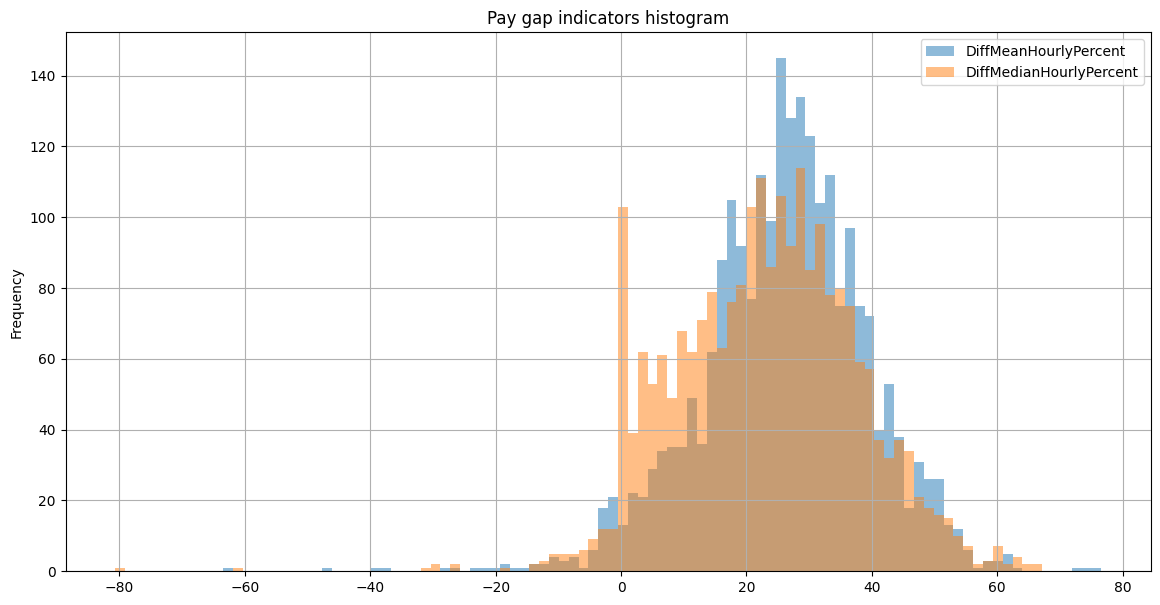

In [16]:
pay_gap_indicators =filtered_data[['DiffMeanHourlyPercent', 'DiffMedianHourlyPercent']]
pay_gap_indicators.plot.hist(bins=100, alpha=0.5, figsize=(14,7),
                             grid=True, title="Pay gap indicators histogram")

In [17]:
# Assuming your cleaned DataFrame is called 'filtered_data'
filtered_data.to_csv('cleaned_finance_gender_gap.csv', index=False)


Looking at the data you provided, it seems there are extreme values (outliers) present, as indicated by the minimum and maximum values and the standard deviation. For example, the DiffMeanBonusPercent column has a minimum value of -5028.5 and a maximum value of 104.9, which is a huge range. The standard deviation is also quite large, indicating a wide spread of data.

Given these characteristics, the median would be a more appropriate measure of central tendency for this data. The median would give a better representation of the “typical” value in each column, as it wouldn’t be skewed by the extreme values.

In conclusion, due to the presence of outliers in the dataset, using the median for analysis would provide a more accurate representation of the central tendency of the data.

### (c) Interpreting Analysis for Insights


**Difference in hourly rate**
- Men’s hourly median rate is 22.9% greater than Women’s .

In other words, when comparing median hourly rates, men earn £1.229 for every £1 that women earn.


**Proportion of women in each pay quartile**
- Top salary quartile has 69.9% men and 30.10% women.
- Upper-middle salary quartile has 58.41% men and 41.59% women.
- Lower-middle salary quartile has 49.44% men and 50.56% women.
- Lower salary quartile has 42.51% men and 57.49% women.


**Who received bonus pay**
- 69.65% of men.

- 67.97% of women.

**Difference in bonus pay**
- Men’s median bonus pay rate is 26.76% greater than Women’s .

In other words, when comparing  median bonus pay rate, men earn £1.268 for every £1 that women earn.

### (d) Crafting Visual Representations
I utilized Power BI for data visualization and embedded the interactive report into Google Colab. This approach allowed for dynamic exploration of the data with diverse visualizations, enhancing the understanding of the gender pay gap data.


Image Files: ['/content/drive/MyDrive/visual/ffffffffffff.PNG', '/content/drive/MyDrive/visual/gghhfh.PNG', '/content/drive/MyDrive/visual/jjjjj.PNG', '/content/drive/MyDrive/visual/jjytjyj.PNG', '/content/drive/MyDrive/visual/sss.PNG', '/content/drive/MyDrive/visual/fffhj.PNG', '/content/drive/MyDrive/visual/fdbgsdbsd.PNG', '/content/drive/MyDrive/visual/dfghfdb.PNG', '/content/drive/MyDrive/visual/kl,ik,iutkik.PNG', '/content/drive/MyDrive/visual/vvvv.PNG', '/content/drive/MyDrive/visual/ccc.PNG']


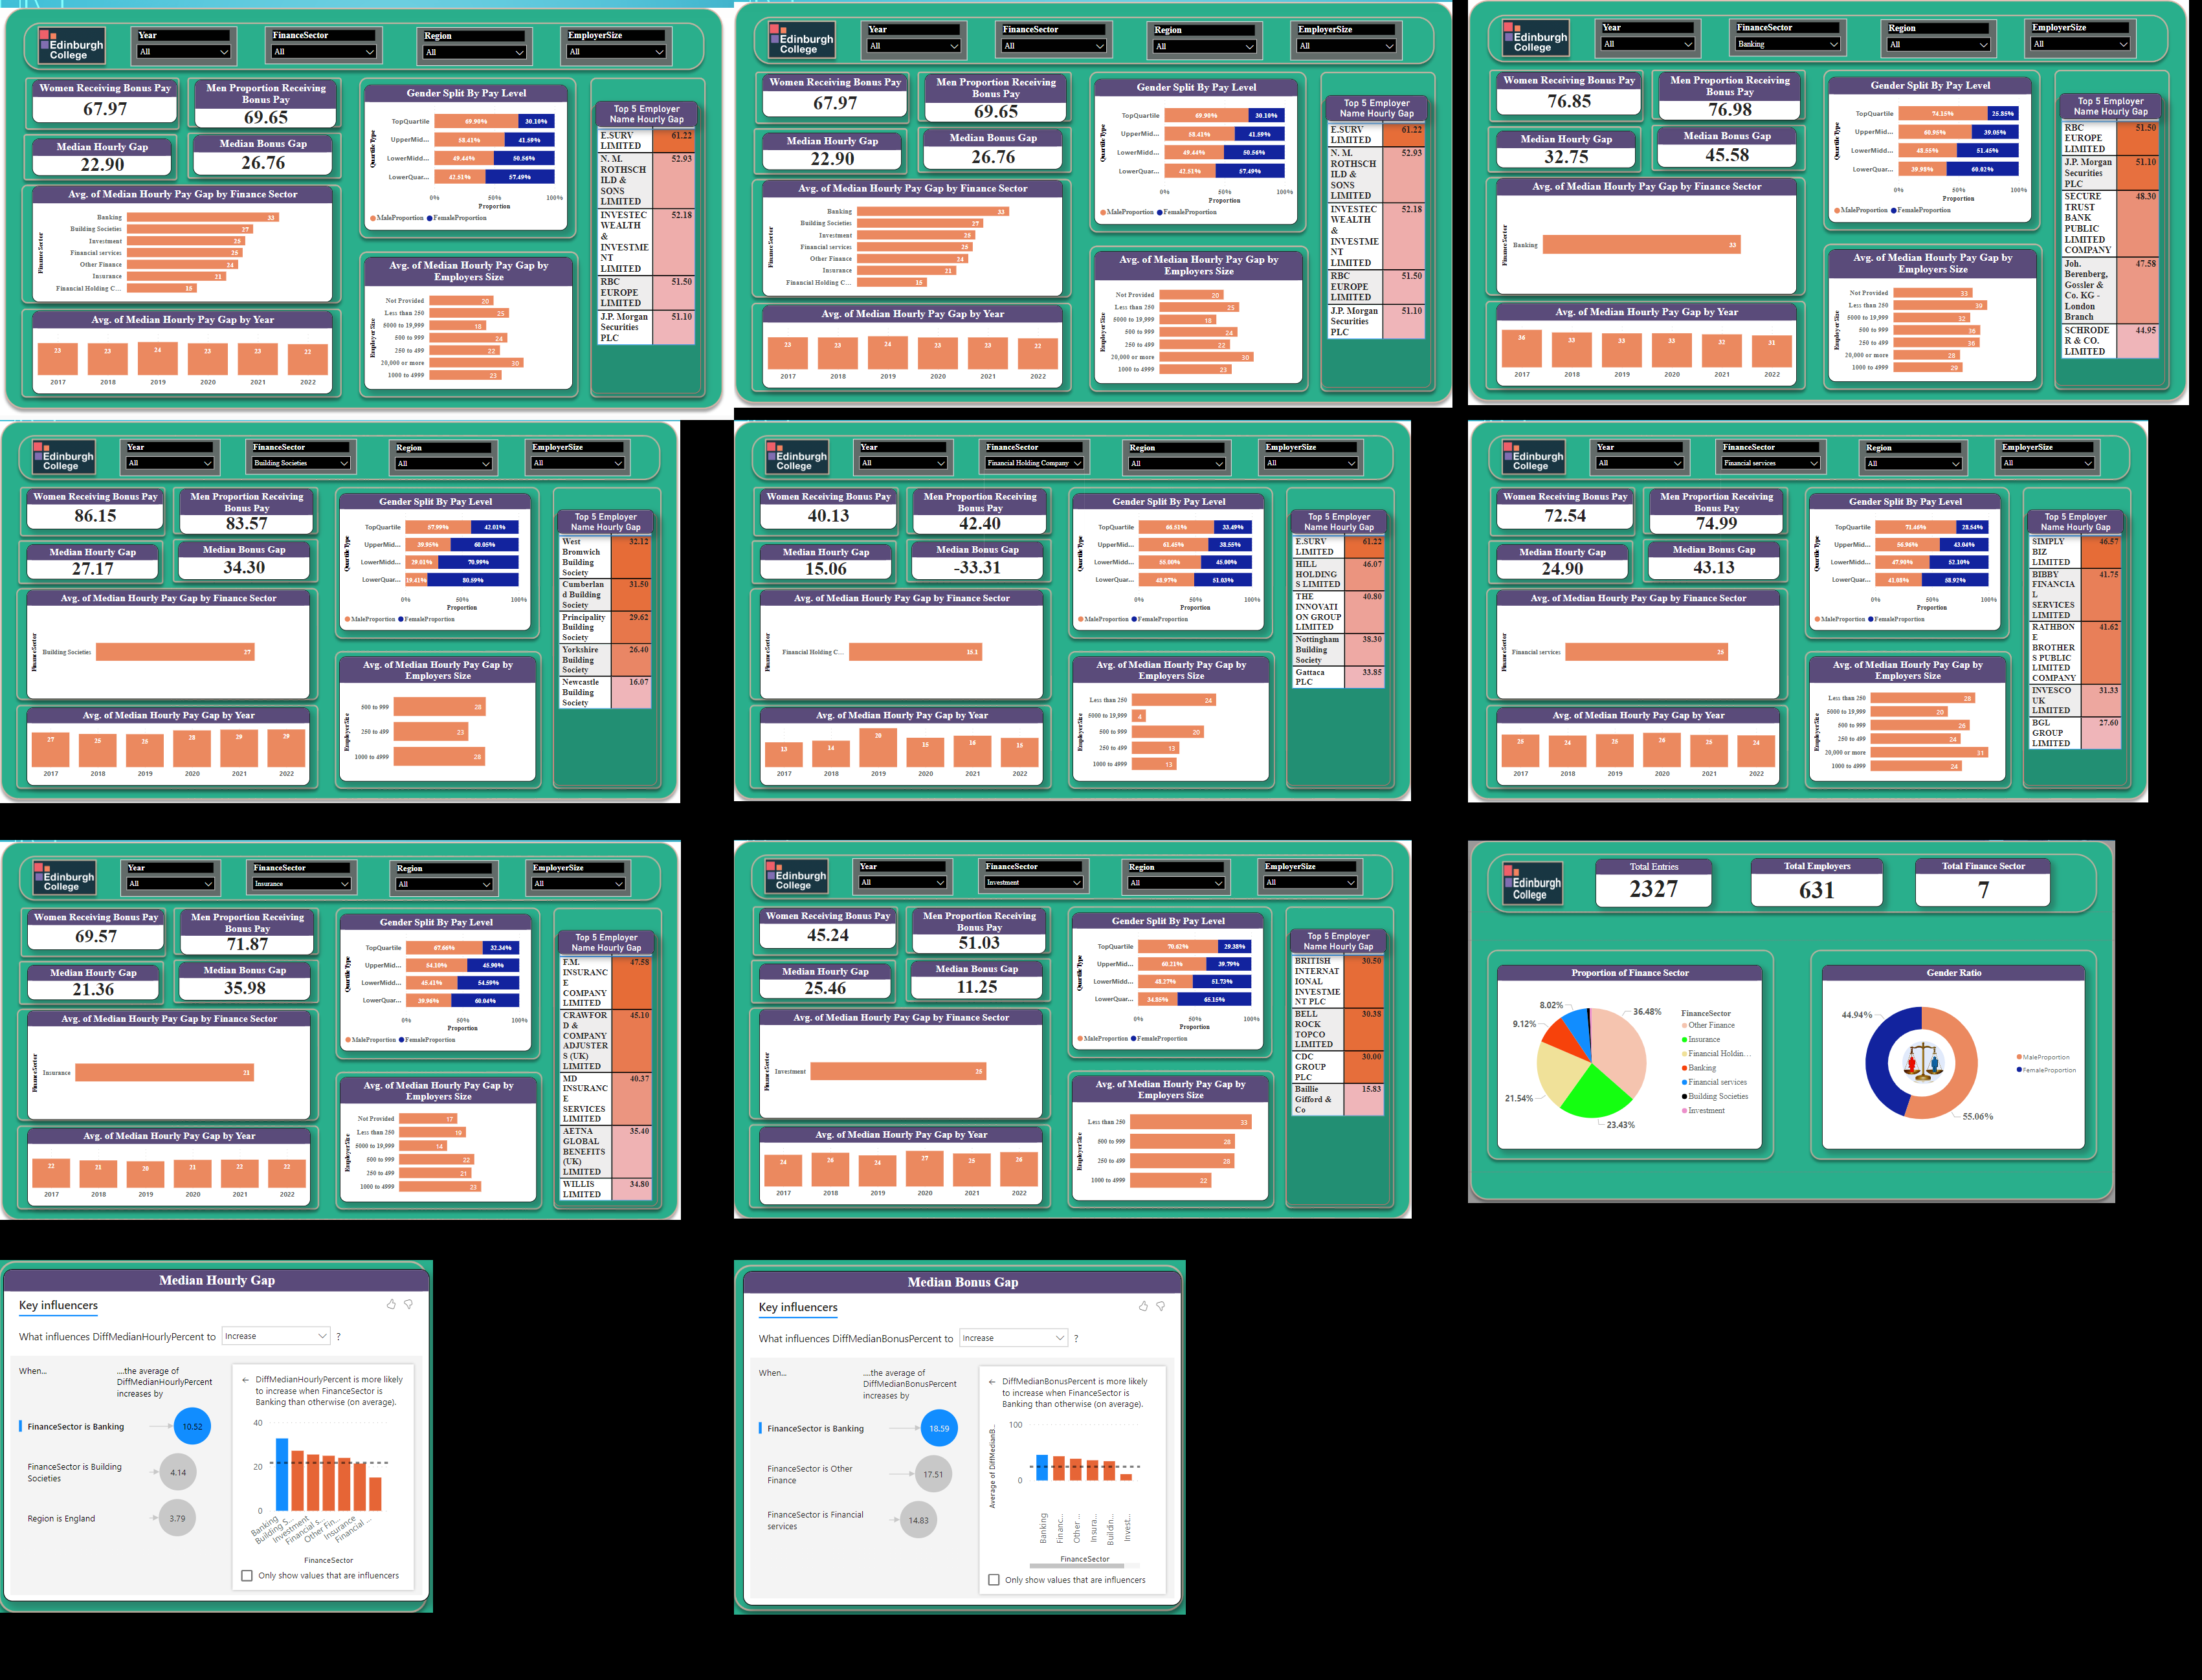

In [14]:
# @title Default title text
import os
from PIL import Image
from IPython.display import display

# Define the folder path containing the images
folder_path = '/content/drive/MyDrive/visual'

# Get a list of image files in the folder
image_files = [os.path.join(folder_path, filename) for filename in os.listdir(folder_path) if any(filename.lower().endswith(ext) for ext in ['.png', '.jpg'])]

# Print the list of image files for debugging
print("Image Files:", image_files)

# Check if there are any image files
if not image_files:
    print("No image files found in the specified folder.")
else:
    # Open the images
    images = [Image.open(filename) for filename in image_files]

    # Get the dimensions of the images
    width, height = images[0].size

    # Calculate the grid size based on the number of images
    num_images = len(images)
    num_columns = 3
    num_rows = -(-num_images // num_columns)  # Ceiling division

    # Create a new image with the appropriate dimensions for the grid
    new_width = width * num_columns
    new_height = height * num_rows
    new_image = Image.new('RGB', (new_width, new_height))

    # Paste the images in the grid
    for i, image in enumerate(images):
        column = i % num_columns
        row = i // num_columns
        new_image.paste(image, (column * width, row * height))

    # Display the combined image
    display(new_image)



In [8]:
from IPython.display import display, HTML

# Define the embed code
embed_code = '''<iframe title="final gender gap " width="1140" height="541.25" src="https://app.powerbi.com/reportEmbed?reportId=42df1fb0-a985-4de3-8a57-781032629417&autoAuth=true&ctid=de73f96d-8ea1-4b80-a6a2-5165bfd494db" frameborder="0" allowFullScreen="true"></iframe>
'''

# Display in Google Colab
display(HTML(embed_code))
